## Installing dependencies

In [10]:
!pip install diffusers transformers accelerate scipy safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.7 MB/s eta 0:00:00a 0:00:01


## Imports

In [18]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

## Importing Stable Diffusion 2.1 from HuggingFace

In [19]:
# Paper:
# SeedSelect employs Stable Diffusion v2.1 with a guidance scale of 7.5 and 7 denoising steps 
# using EulerDiscreteScheduler (Karras et al. 2022)

model_id = "stabilityai/stable-diffusion-2-1"
scheduler = EulerDiscreteScheduler.from_pretrained(
    model_id, subfolder="scheduler"
)

pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,
    scheduler=scheduler
)

pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [38]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.0",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/1000 [00:00<?, ?it/s]

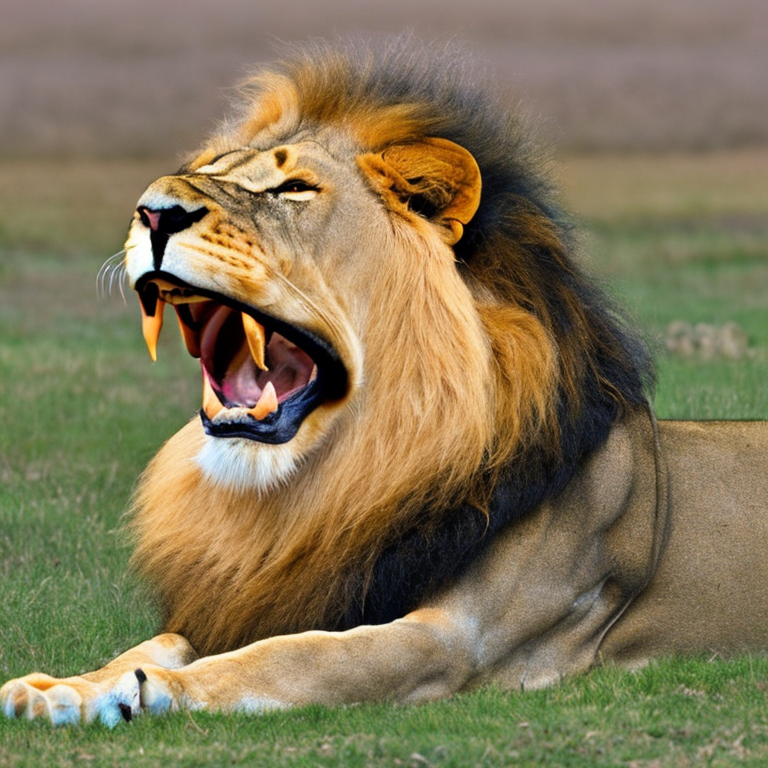

In [37]:
NUM_INFERENCE_STEPS = 7
GUIDANCE_SCALE = 7.5

prompt = "A photo of a lion roaring loudly"
image = pipe(prompt, num_inference_steps=NUM_INFERENCE_STEPS, guidance_scale=GUIDANCE_SCALE).images[0]
    
image

In [16]:
type(image)

PIL.Image.Image

TODO:

- generate images [x]
- access vae []
- access initial distribution []
- access clip encoder []